# Baseball Case Study
### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
For downloading the dataset, use the link given below. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv


# 

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Meanings of Each Terms
#### Batting statistics

1] 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

2] 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

3] AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

4] R – Runs scored: number of times a player crosses home plate

5] H – Hit: reaching base because of a batted, fair ball without error by the defense

6] BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

7] HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

#### Pitching statistics

1] W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

2] SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

3] SO – Strikeout: number of batters who received strike three

4] RA – Run average: number of runs allowed times nine divided by innings pitched

5] ER – Earned run: number of runs that did not occur as a result of errors or passed balls

6] ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

7] CG – Complete game: number of games where player was the only pitcher for their team

8] SHO – Shutout: number of complete games pitched with no runs allowed

#### Fielding statistics

1] E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

#### Baserunning statistics

1] SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense 

### Pre-processing 

In [6]:
# checking columns avaialbe in the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
# checking shape of the dataset
df.shape

(30, 17)

In [8]:
# checking null values present in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
# checking datatypes after replacing
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
# checking all null values and datatypes after transformation
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
# Check for duplicate rows
duplicate = df[df.duplicated()]

# Print any duplicate rows found
if not duplicate.empty:
    print("Duplicate Rows:")
    print(duplicate)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observations
###### There are no nulls values
###### the dataset consist of 30 rows and 17 columns
######  the data is skewed in SB,CG,SHO,SV,E
###### the standard deviation is more in some columns
###### no duplicate are present in the dataset

### Linear Regression Model

### EDA and Visualization

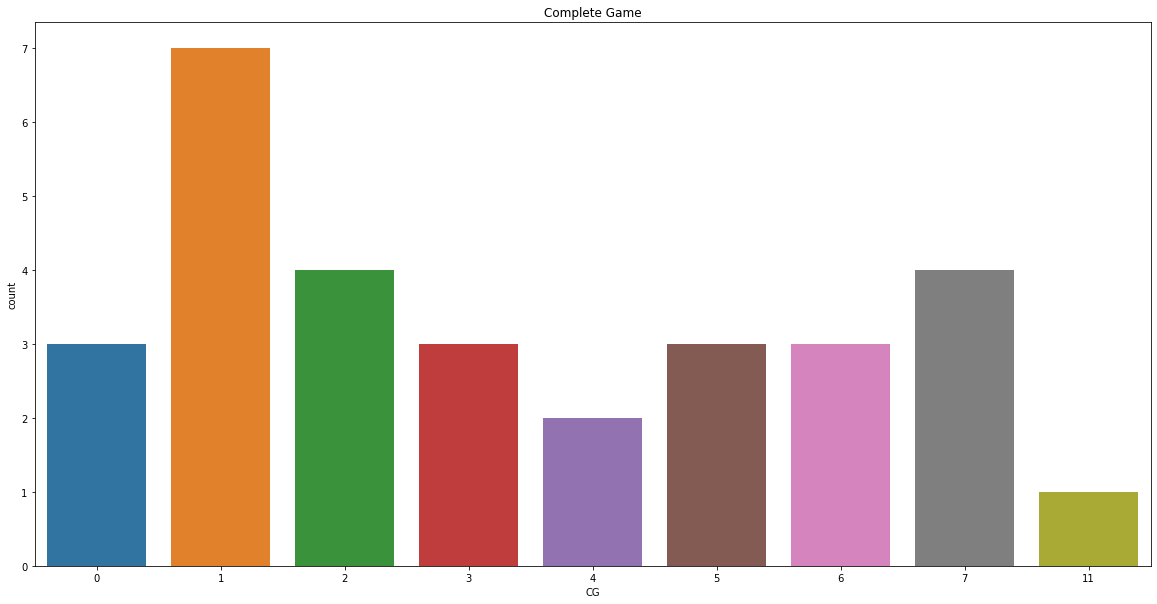

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='CG' , data=df)
plt.title('Complete Game')
plt.show()

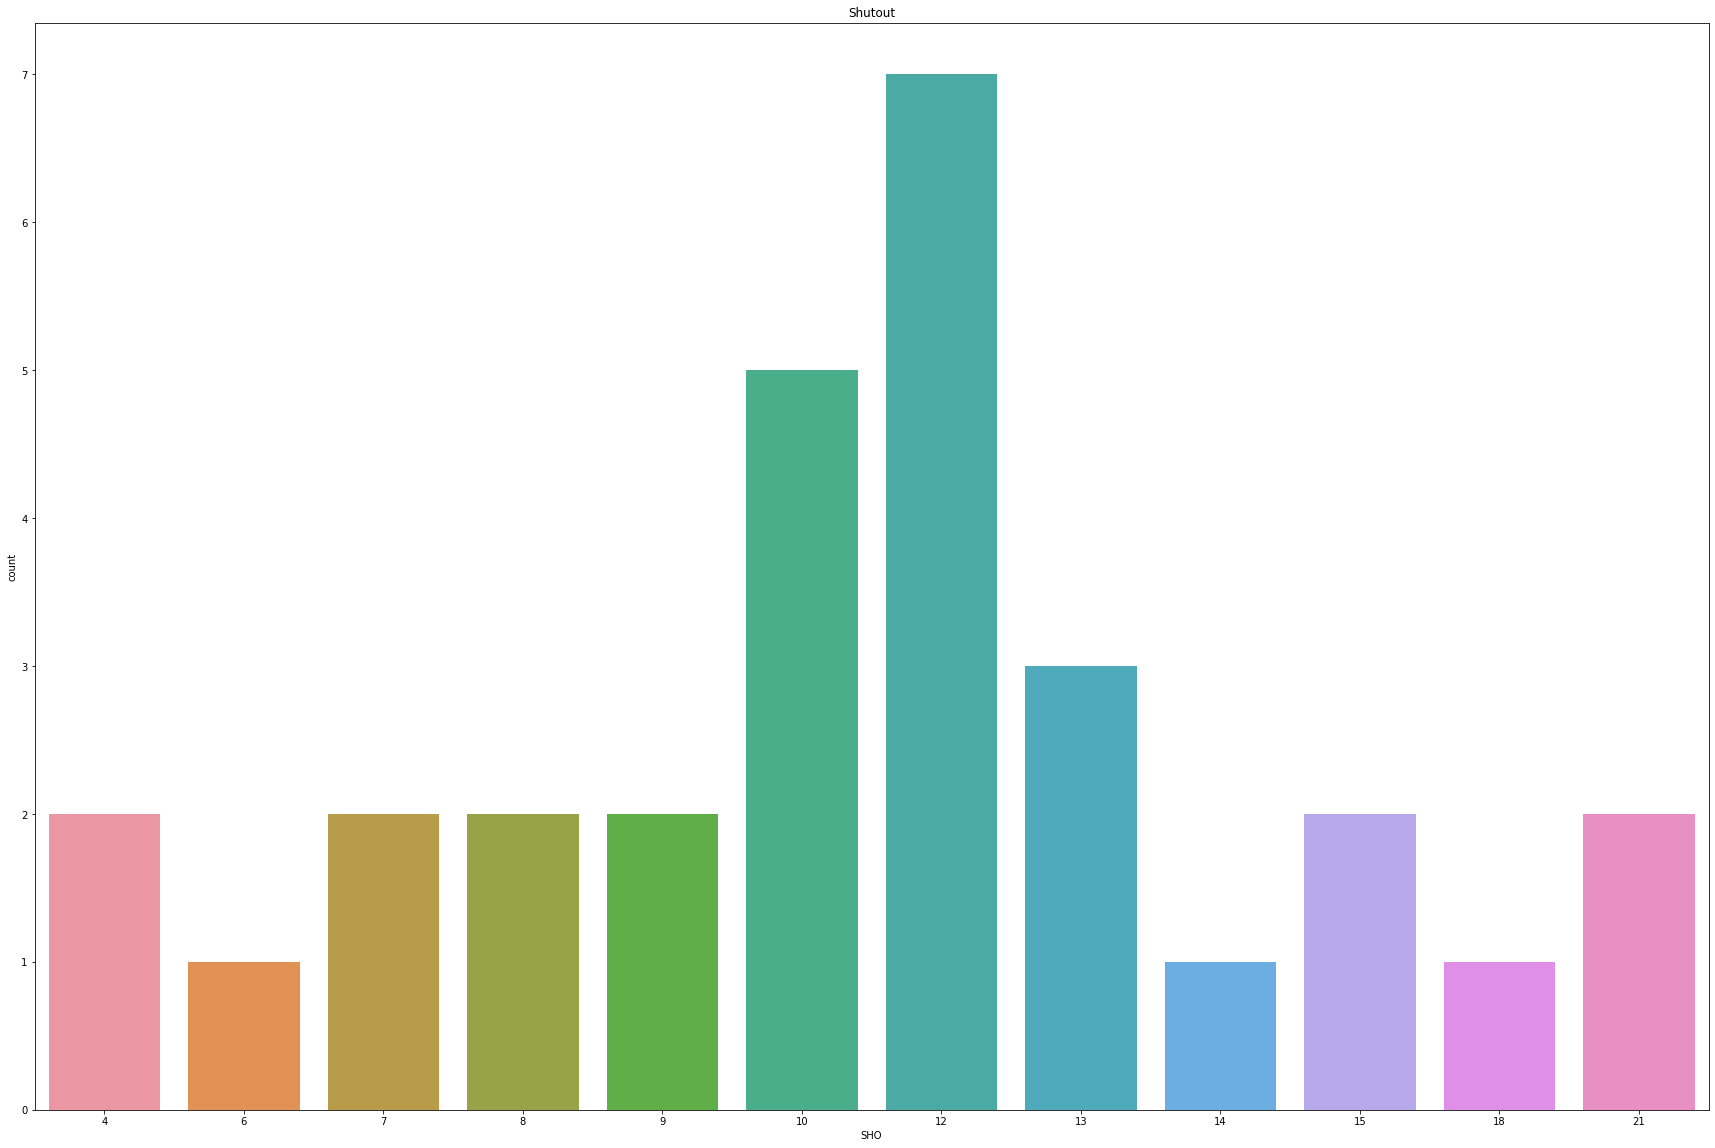

In [18]:
# Seeing which car sold most
plt.figure(figsize=(30,20))
sns.countplot(x='SHO' , data=df)
plt.title('Shutout')
plt.show()

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Print the shape of the correlation matrix
print("Shape of correlation matrix:", corr.shape)

Shape of correlation matrix: (17, 17)


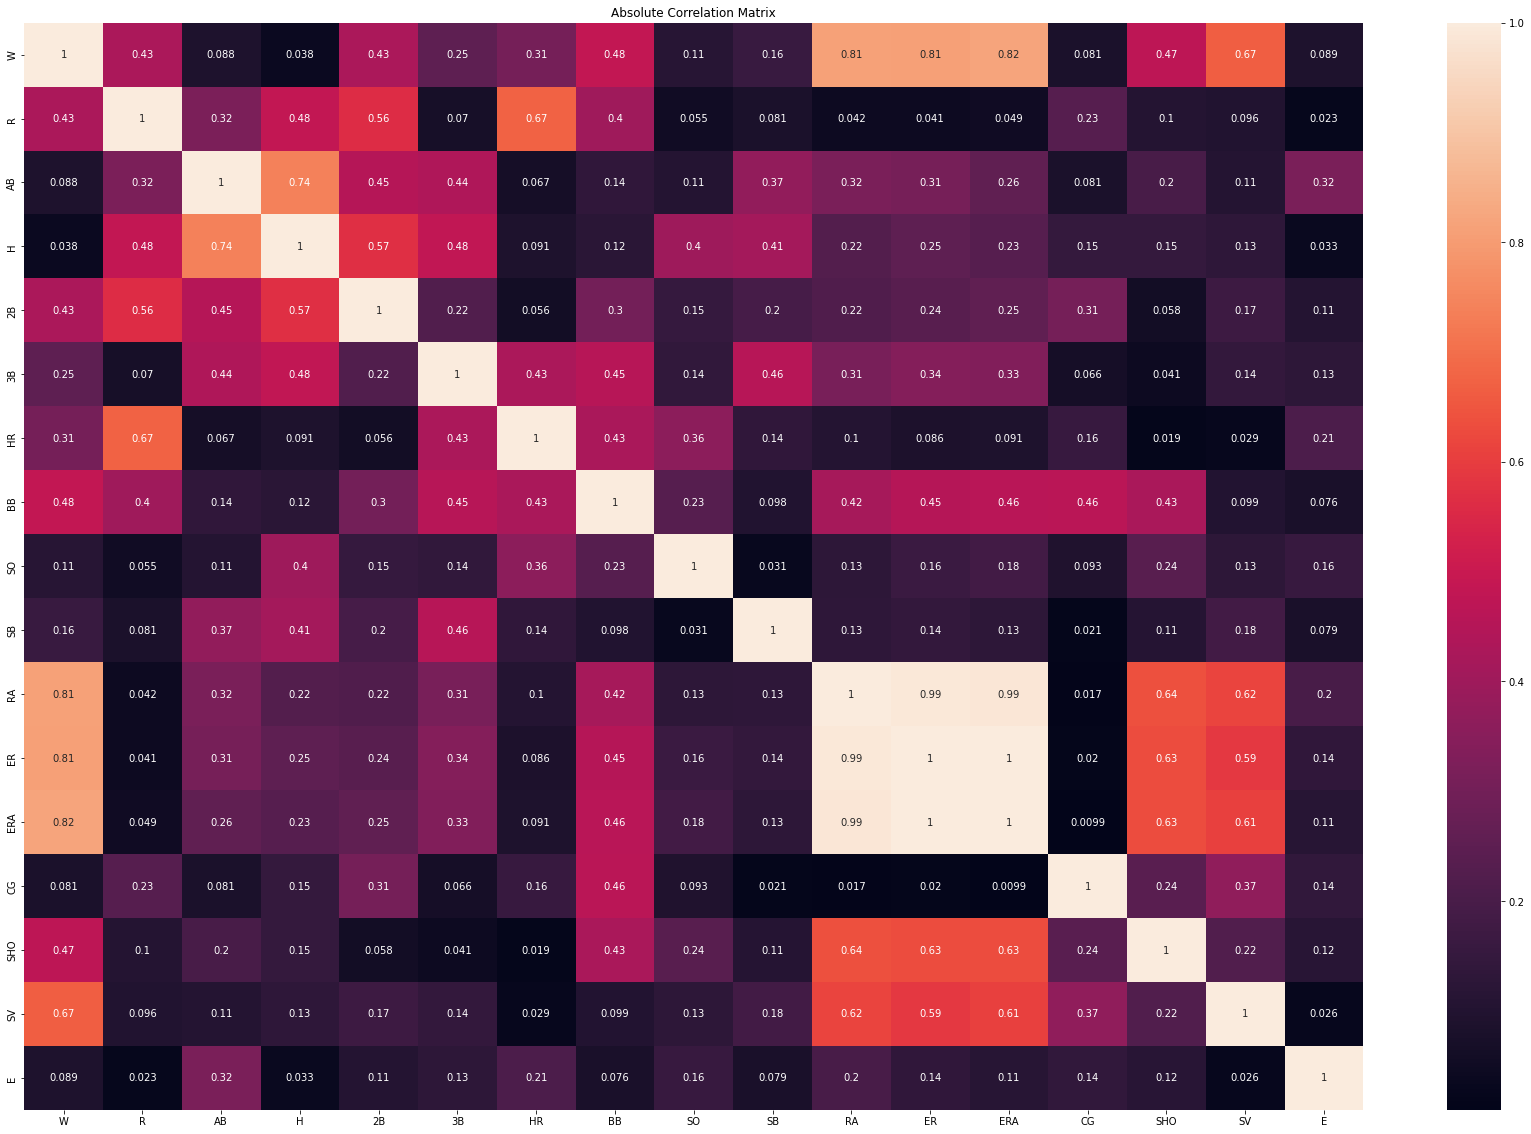

In [21]:
# Compute the absolute correlation matrix
corr = df.corr().abs()

# Create a heatmap of the absolute correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)
plt.title('Absolute Correlation Matrix')
plt.show()

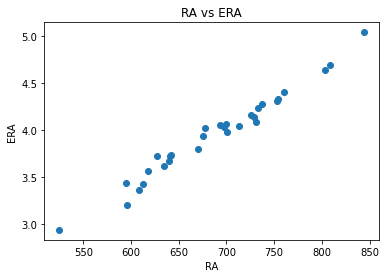

In [22]:
plt.scatter(df['RA'],df['ERA'])
plt.xlabel('RA')
plt.ylabel('ERA')
plt.title('RA vs ERA')
plt.show()


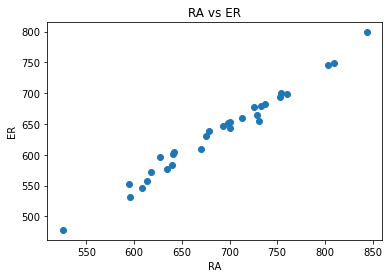

In [24]:
plt.scatter(df['RA'],df['ER'])
plt.xlabel('RA')
plt.ylabel('ER')
plt.title('RA vs ER')
plt.show()

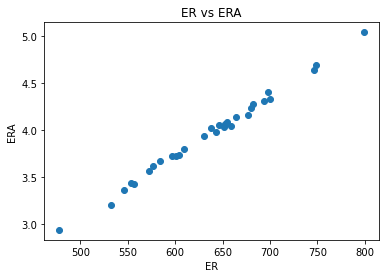

In [25]:
plt.scatter(df['ER'],df['ERA'])
plt.xlabel('ER')
plt.ylabel('ERA')
plt.title('ER vs ERA')
plt.show()

### Observation
######  From the heat map, we can observe that the ER, ERA, and RA are highly co-related to our label but in the feature vs feature same ER, ERA, and RA is highly co-related to each other. H and AB are also highly co-related at 74% but I am assuming 75% is the max so it is ok.

### Plotting Histogram plot to see how data is distributed on an interval scale.

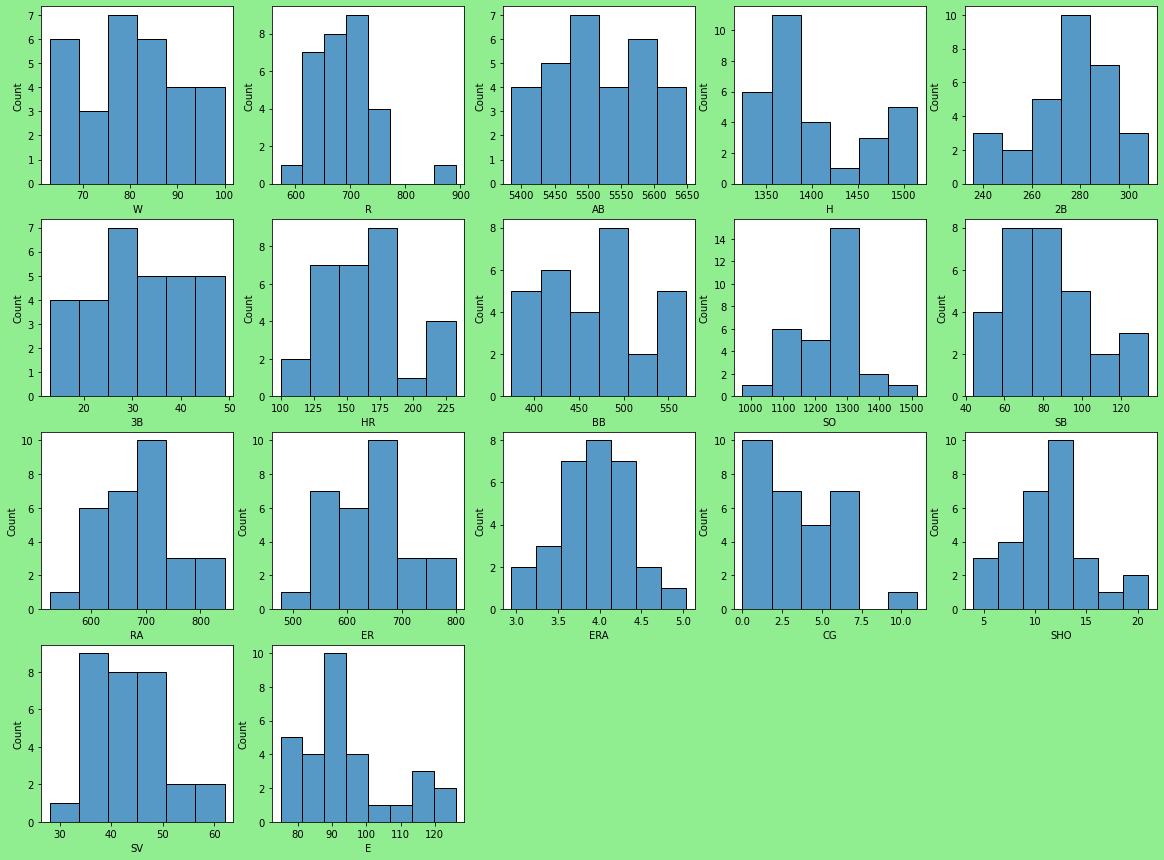

In [29]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'lightgreen')

plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

### Observation
#### From the graph all the data I observe is ok there is a small amount of skewness but we will see it in the box plot.

###  Plotting Disrtibution plot to see how data is distributed

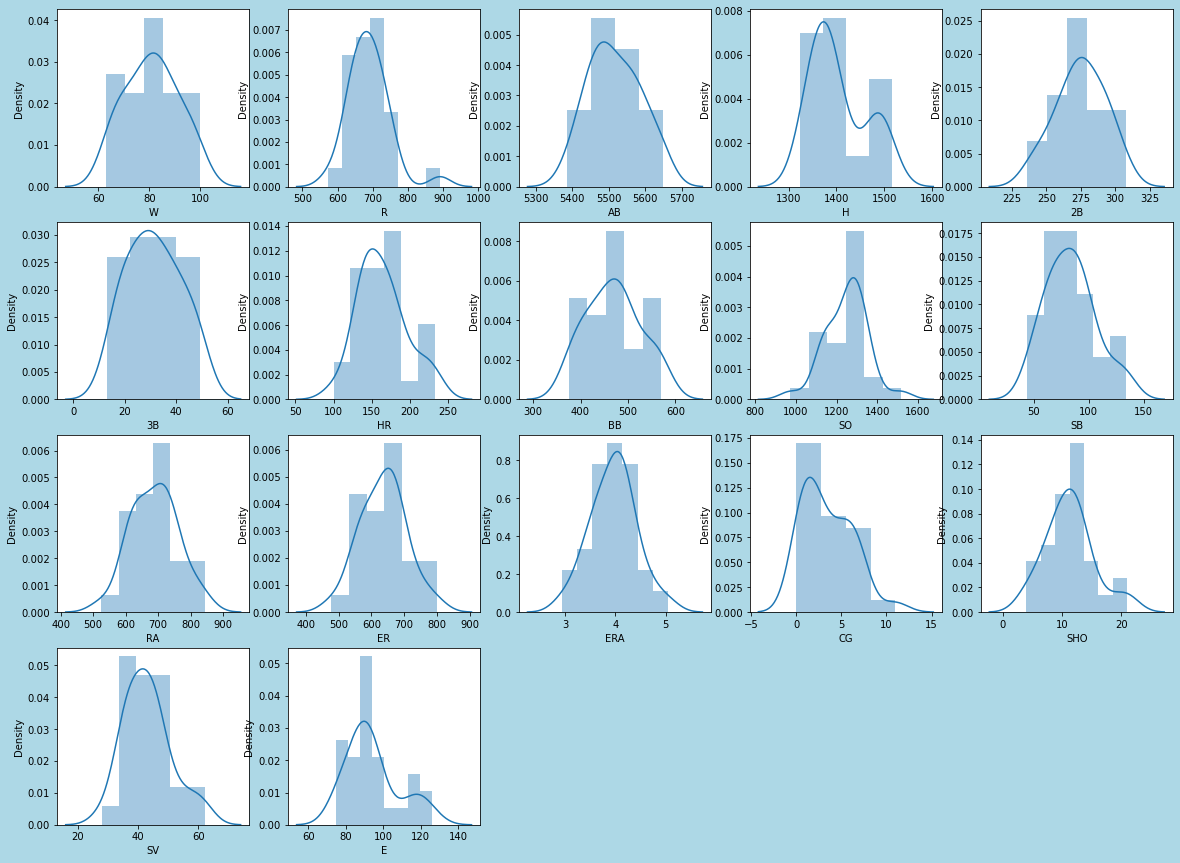

In [32]:
#now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'lightblue')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()


### Observation
From the graph all the data I observe is ok there is a small amount of skewness but we will see it in the box plot.

### Splitting the dataset

In [33]:
X = df.drop(['W'],axis = 1)
y = df['W']

###  Plotting Scatter plot to see realtion between feature and label

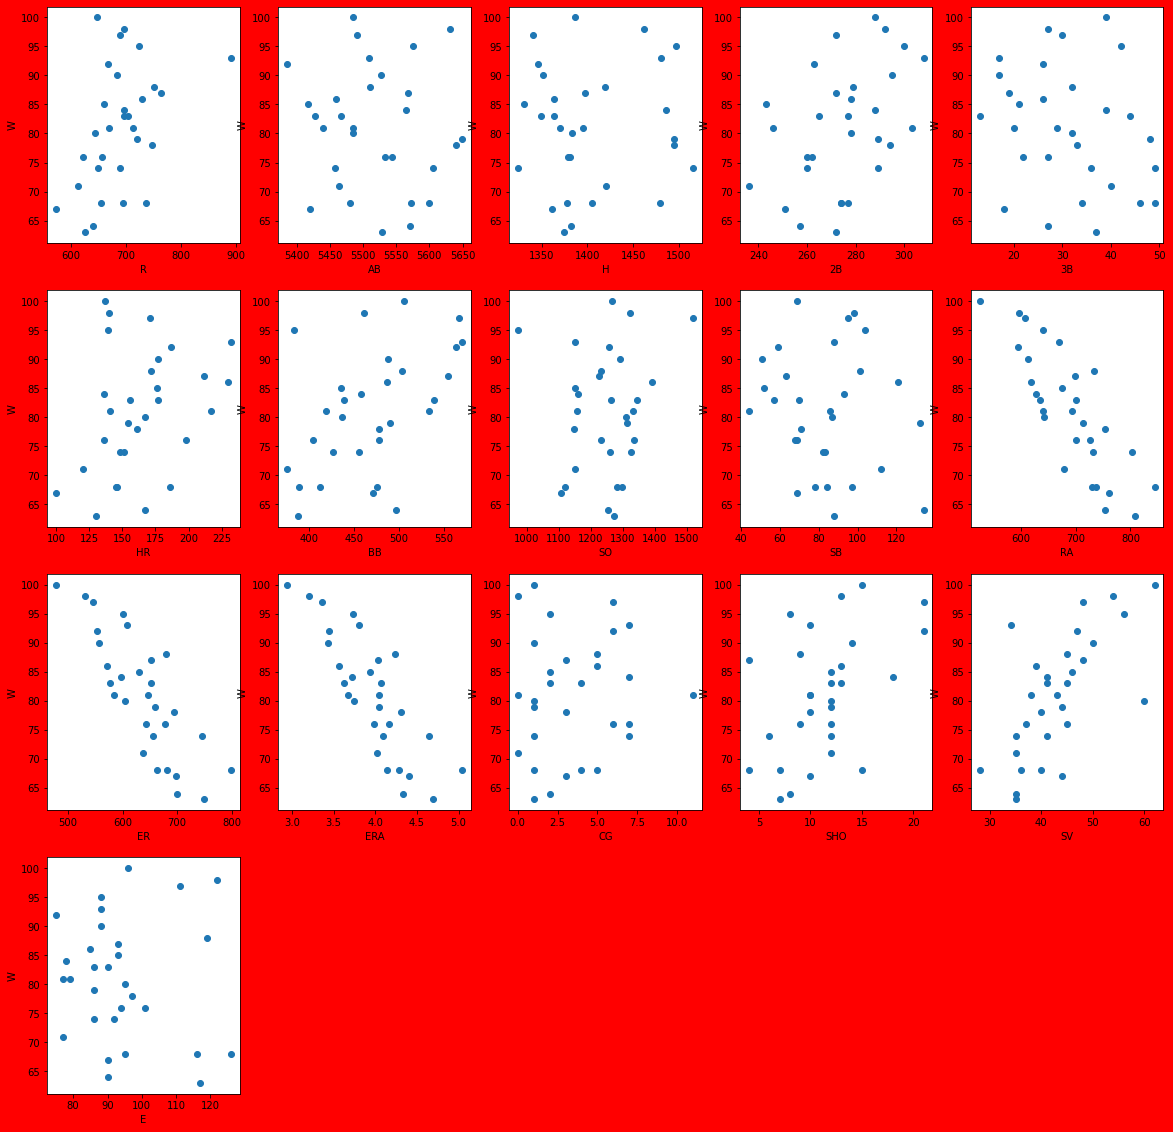

In [34]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,20) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

##### From the graphs, some features are highly negatively co-related some are positively co-related and some feature is not having any relation ship to the label.

### Plotting Regression plot to see realtion between feature and label

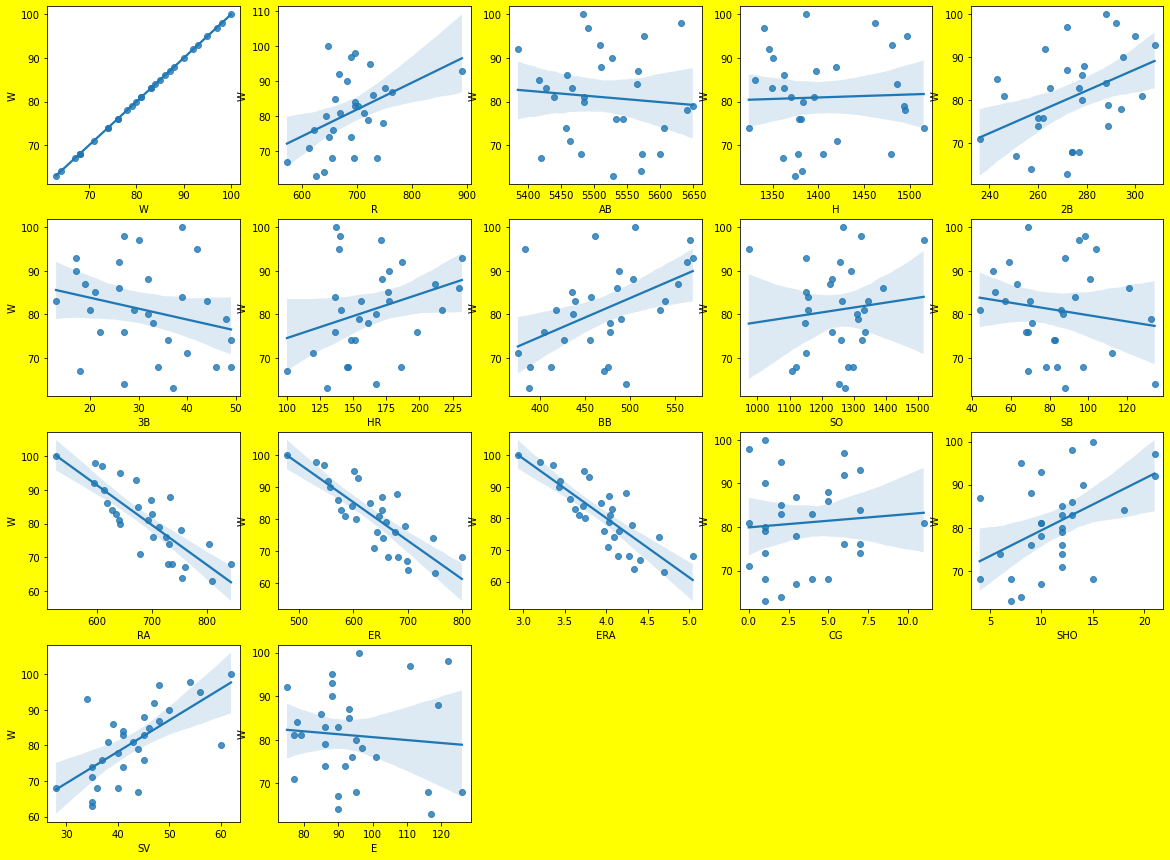

In [36]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()


####  From the regression plot we can clearly observe R,2B,HR,BB,SO,SHO,SV are positively co-related, AB,3B,SB,RA,ER,ERA are negatively co-related.

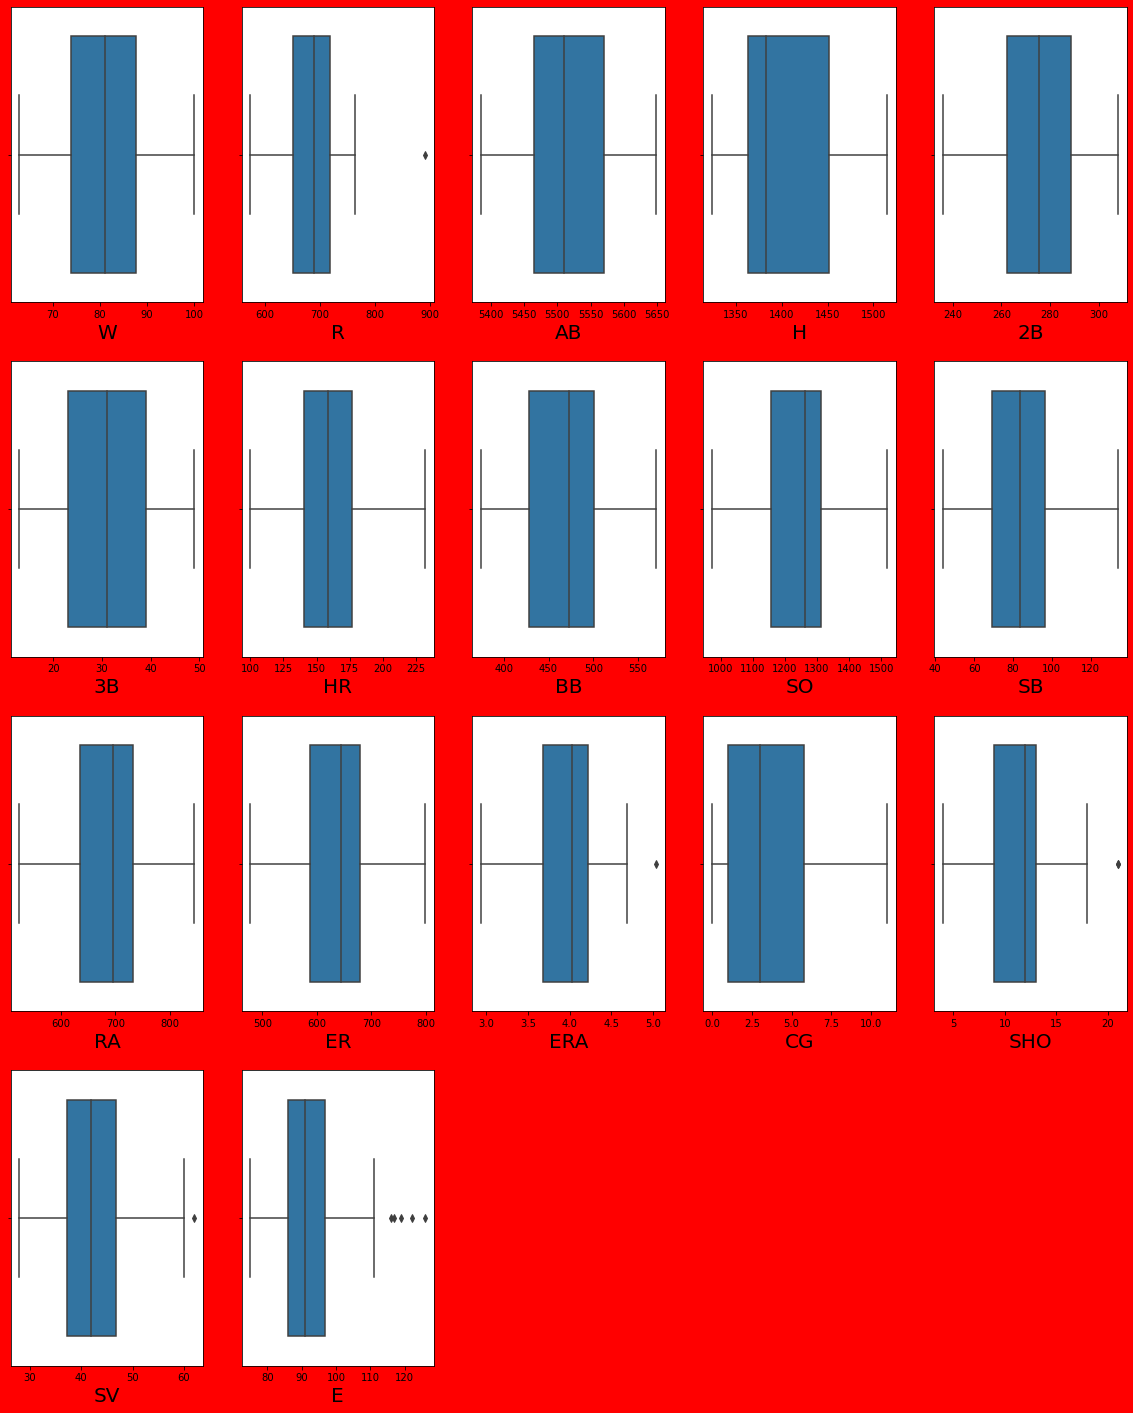

In [37]:
#Plotting Box plot to see outliers are present are not
plt.figure(figsize=(20,25) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 20:
        plt.subplot (4,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### observation :
So in box plot only R,SHO,SV,E are only feature having outlier

### Treating the outlier by Zscore method

In [38]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [39]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df1 = df[filtering_entry]

df1.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [41]:
#checking the dataloss after tresting the outliers
print('Percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

Percentage of loss of data by zscore is : 0.03333333333333333


### Checking for the multicollinearity Using VIF

In [43]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale the predictor variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the VIF values for the scaled predictor variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Predictor"] = X.columns

# Print the VIF values
print(vif)

     VIF Factor Predictor
0     11.522370         R
1     13.311532        AB
2     10.070668         H
3      4.019297        2B
4      3.294146        3B
5     10.079902        HR
6      3.806098        BB
7      2.652401        SO
8      2.102684        SB
9    191.839155        RA
10  1680.387145        ER
11  1222.722240       ERA
12     3.059904        CG
13     3.654331       SHO
14     5.798850        SV
15     2.186219         E


In [44]:
# dropping RA , ER , ERA due to high VIF
X = df.drop(['RA','ER','ERA'],axis = 1)

In [45]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('W' , axis =1 ).corrwith (df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

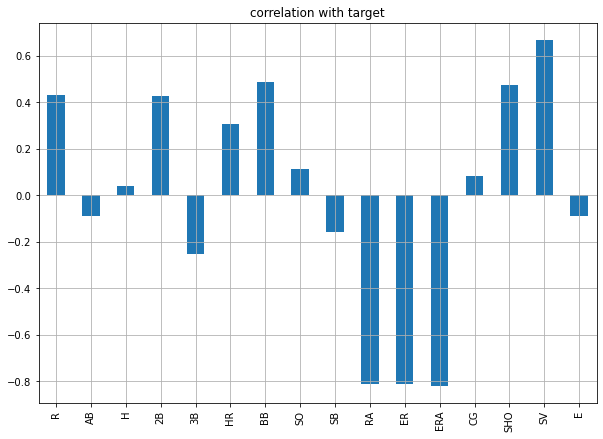

In [46]:
# convert above numbers into graph for better understanding
df.drop('W' , axis = 1).corrwith (df.W).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

#### The above graphs show the relation with the target variable R,2B,HR,BB,SHO,SV are highly positively co-related and RA,ER,ERA are highly negatively co-related and which we dropped due to high VIF

### Feature selection by SELECT PERCENTILE FEATURE

In [47]:
### 2ND FEATURE SELECTION TECHNIQUE (SELECT PERCENTILE FEATURE , CHI2)
from sklearn.feature_selection import SelectPercentile , chi2

In [48]:
Spercentile = SelectPercentile(score_func = chi2 , percentile = 70)
sp = Spercentile.fit(X,y)

In [49]:
X.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [50]:
# instantiate selectpercentile an fit (feature and label)
X = df.drop(['W'] , axis=1)
y = df['W']

In [51]:
# seperate the feature to check the p value
cols = Spercentile.get_support(indices = True)  # this will give you index of 80% feature
print ('feature index'  , cols)

feature = X.columns[cols]                       # this will give you name of that 80% feature
print('feature' , list(feature))

feature index [ 0  1  3  5  6  7  8  9 12 13]
feature ['R', 'AB', '2B', 'HR', 'BB', 'SO', 'SB', 'RA', 'CG', 'SHO']


### Scaling the dataset

In [52]:
#scale our data using standard sclar

scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

### Finding the best Random state

In [53]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 97.00301891668136 RandomState 0
Testing Score 48.29772517449125 RandomState 0


MAXINING TESTING SCORE 48.29772517449125 ON RANDOM STATE OF 0
Training Score 97.82124087918424 RandomState 1
Testing Score 7.48584237493729 RandomState 1


Training Score 99.40887480794483 RandomState 2
Testing Score -200.23894077646398 RandomState 2


Training Score 97.33967715951114 RandomState 3
Testing Score 56.569653053256744 RandomState 3


MAXINING TESTING SCORE 56.569653053256744 ON RANDOM STATE OF 3
Training Score 96.45375082973173 RandomState 4
Testing Score 60.20054031133959 RandomState 4


MAXINING TESTING SCORE 60.20054031133959 ON RANDOM STATE OF 4
Training Score 95.25192380276357 RandomState 5
Testing Score 74.15721209493205 RandomState 5


MAXINING TESTING SCORE 74.15721209493205 ON RANDOM STATE OF 5
Training Score 95.60336847885571 RandomState 6
Testing Score 71.71488150121573 RandomState 6


Training Score 96.53199973317543 RandomState 7
Testing Score 42.66108889812157 Rando

Training Score 96.99510340746797 RandomState 94
Testing Score 10.059262748511244 RandomState 94


Training Score 97.2696736721831 RandomState 95
Testing Score -30.864919588730764 RandomState 95


Training Score 96.26307086299586 RandomState 96
Testing Score 52.94582298894382 RandomState 96


Training Score 97.3755098051192 RandomState 97
Testing Score 19.024628334884696 RandomState 97


Training Score 98.36126399878621 RandomState 98
Testing Score 74.41083173369503 RandomState 98


Training Score 95.71383242408464 RandomState 99
Testing Score 72.57065088780575 RandomState 99


Training Score 97.46429133899076 RandomState 100
Testing Score -35.32055809419934 RandomState 100


Training Score 97.39126793779188 RandomState 101
Testing Score 38.54716479589499 RandomState 101


Training Score 97.08246249756208 RandomState 102
Testing Score -16.682488791419892 RandomState 102


Training Score 95.98680217690469 RandomState 103
Testing Score 66.96728042508877 RandomState 103


Training Score 94

Training Score 96.62359777485344 RandomState 190
Testing Score -80.72606894455323 RandomState 190


Training Score 96.05831009930712 RandomState 191
Testing Score 82.88592686031346 RandomState 191


Training Score 98.825634893828 RandomState 192
Testing Score -273.21159898523945 RandomState 192


Training Score 94.48788873871177 RandomState 193
Testing Score 81.36339497450207 RandomState 193


Training Score 99.19358648867355 RandomState 194
Testing Score -15.257754610816598 RandomState 194


Training Score 95.41722942248401 RandomState 195
Testing Score 82.23063249788208 RandomState 195


Training Score 95.7436690283721 RandomState 196
Testing Score 76.55029120958446 RandomState 196


Training Score 96.37780043108646 RandomState 197
Testing Score 69.39769646921835 RandomState 197


Training Score 96.90405124682246 RandomState 198
Testing Score 54.49271065129941 RandomState 198


Training Score 99.74724514771684 RandomState 199
Testing Score -83.93498280614271 RandomState 199




### Training the model

In [54]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=165)

In [55]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [56]:
#training score
regression.score(X_train,y_train)  

0.9463406728192236

In [57]:
#testing score
regression.score(X_test,y_test) 

0.8952394441101414

### Model Score
Training Score = 94.63406728192237 %
Testing Score = 89.52394441101397 %

In [58]:
y_pred=regression.predict(X_test)
y_pred

array([57.74651566, 79.91144748, 84.93753405, 64.76171212, 96.34007344,
       67.3043239 , 80.07611159, 86.42343912])

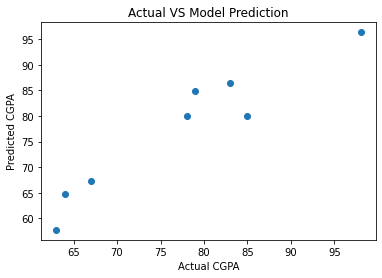

In [59]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

### Checking MAE , MSE & RMSE scores

In [60]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
# again predict 
y_pred = regression.predict(X_test)

In [62]:
#MSE
mean_squared_error(y_test,y_pred)

13.237478366895095

In [63]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

3.6383345595059144

# Scores
#### MAE SCORE = 3.0219694990529975
#### MSE SCORE = 13.23747836689532
#### RMSE SCORE = 3.638334559505945

# LASSO Model

In [64]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [66]:
# Create a LassoCV object and fit it to the training data
lassocv = LassoCV(alphas=None, max_iter=100)
lassocv.fit(X_train, y_train)

# Print the best alpha value and corresponding R-squared score
print("Best alpha value:", lassocv.alpha_)
print("R-squared score:", lassocv.score(X_test, y_test))

Best alpha value: 8.932325329229357
R-squared score: 0.85809378806911


#  RIDGE MODEL

In [71]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create a Ridge object and fit it to the training data
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict the test set labels and compute the R-squared score
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.890082506135931


# SCORES
LASSO SCORES = 89.32325329229357 %    
RIDGE SCORES = 89.0082506135931 %

In [72]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -1.0579322058345566 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 3 the cv score is 0.22588460167736446 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 4 the cv score is 0.24952166654371594 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 5 the cv score is 0.04075540667464968 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 6 the cv score is 0.25153530937201224 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 7 the cv score is 0.38908046442901434 and the R2 score for Training is 0.9463406728192236 and R2 score for the Testing is0.8952394441101414


At cross fold 8 the cv score is 0.3193702210966858 and the R2 sc

# Cross-Validation Score
Training Score = 94.63406728192237 %

Testing Score = 89.52394441101397 %

# AdaBoostRegressor Model

In [73]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Finding the best random state

In [77]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 98.74864014328233 RandomState 0
Testing Score 17.55778334725703 RandomState 0


MAXINING TESTING SCORE 17.55778334725703 ON RANDOM STATE OF 0
Training Score 97.77342098992887 RandomState 1
Testing Score 64.32636131593874 RandomState 1


MAXINING TESTING SCORE 64.32636131593874 ON RANDOM STATE OF 1
Training Score 97.43717764883732 RandomState 2
Testing Score 34.89307111443033 RandomState 2


Training Score 99.26155774732072 RandomState 3
Testing Score 48.55013375677723 RandomState 3


Training Score 98.67899330614432 RandomState 4
Testing Score 8.54377934015228 RandomState 4


Training Score 98.91343043350815 RandomState 5
Testing Score 43.153248417848275 RandomState 5


Training Score 98.74843245723652 RandomState 6
Testing Score 57.065394119698595 RandomState 6


Training Score 99.15795047300688 RandomState 7
Testing Score 58.49820790519304 RandomState 7


Training Score 99.76403977896344 RandomState 8
Testing Score 53.57712405346533 RandomState 8


Training Score 99.07

Training Score 99.27444544185119 RandomState 80
Testing Score 72.36346685049813 RandomState 80


Training Score 98.68768461713246 RandomState 81
Testing Score -18.652524834437113 RandomState 81


Training Score 99.07414776720744 RandomState 82
Testing Score 71.10125958764337 RandomState 82


Training Score 99.72274992918756 RandomState 83
Testing Score 15.766615283757679 RandomState 83


Training Score 98.55910397207185 RandomState 84
Testing Score 60.77685627442469 RandomState 84


Training Score 99.56599824460882 RandomState 85
Testing Score 30.389925079055224 RandomState 85


Training Score 99.05779681748052 RandomState 86
Testing Score 51.67264129034983 RandomState 86


Training Score 99.10785340795113 RandomState 87
Testing Score 61.45300163861166 RandomState 87


Training Score 98.3268055966105 RandomState 88
Testing Score -128.8671189677387 RandomState 88


Training Score 99.74105357216372 RandomState 89
Testing Score 66.52215179000893 RandomState 89


Training Score 98.84590971

Training Score 98.49437671444797 RandomState 163
Testing Score 74.46822887105057 RandomState 163


Training Score 99.05353383606727 RandomState 164
Testing Score -32.713098877563375 RandomState 164


Training Score 99.18993268966364 RandomState 165
Testing Score 57.87683937183134 RandomState 165


Training Score 99.29145409784174 RandomState 166
Testing Score -62.05264034649347 RandomState 166


Training Score 99.37947335871904 RandomState 167
Testing Score 72.78456865337404 RandomState 167


Training Score 99.20557663897809 RandomState 168
Testing Score 55.76623747421161 RandomState 168


Training Score 98.89703822253203 RandomState 169
Testing Score 17.307396672034326 RandomState 169


Training Score 98.77392499894965 RandomState 170
Testing Score 48.80671713571195 RandomState 170


Training Score 99.21435264660813 RandomState 171
Testing Score 47.96857043959846 RandomState 171


Training Score 98.67817826532784 RandomState 172
Testing Score -28.22049286640724 RandomState 172


Train

In [78]:
#Training the model
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=97)

In [79]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [80]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [81]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9958068582517451


In [82]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [83]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7762316478966442


# Model Scores
   Training Score = 99.58068582517451 %
   
   Testing Score = 77.62316478966442 %

# Hyperparameter Tuning for Ada Boost

In [84]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [85]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [86]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [87]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [88]:

rnd_srch.best_params_

{'n_estimators': 45, 'learning_rate': 0.4}

In [89]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=45)

In [90]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=53)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Testing Score ===
0.6676758998666865


# Model Score after Hyperparameter Tuning
Testing Score = 66.76758998666865%

# Cross Validation for Ada Boost

In [92]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -0.3739357031218435 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 3 the cv score is 0.4053816805042581 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 4 the cv score is 0.4202334191172594 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 5 the cv score is -1.1684247175773763 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 6 the cv score is 0.22665414852291346 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 7 the cv score is -0.00476775950971526 and the R2 score for Training is 0.9916579268049063 and R2 score for the Testing is0.5190240129034382


At cross fold 8 the cv score is -0.3733476966866527 and the R2 sc

### Cross Validation score
Training score = 99.16579268049063%

Testing Score = 51.90240129034382 %

# RandomForestRegressor Model

In [94]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 92.21848040549733 RandomState 0
Testing Score 27.703414090782484 RandomState 0


MAXINING TESTING SCORE 27.703414090782484 ON RANDOM STATE OF 0
Training Score 91.25373501639996 RandomState 1
Testing Score 65.22899602949518 RandomState 1


MAXINING TESTING SCORE 65.22899602949518 ON RANDOM STATE OF 1
Training Score 94.58745543672013 RandomState 2
Testing Score 25.414380881254672 RandomState 2


Training Score 93.54677928114883 RandomState 3
Testing Score 55.59951590060513 RandomState 3


Training Score 91.32808609316254 RandomState 4
Testing Score 12.829911295091678 RandomState 4


Training Score 92.655472299721 RandomState 5
Testing Score 62.5627974044701 RandomState 5


Training Score 92.81162287221791 RandomState 6
Testing Score 48.39761357416531 RandomState 6


Training Score 93.64354525511864 RandomState 7
Testing Score 65.82926816167583 RandomState 7


MAXINING TESTING SCORE 65.82926816167583 ON RANDOM STATE OF 7
Training Score 91.29407529780019 RandomState 8
Testin

Training Score 92.62938176327489 RandomState 82
Testing Score 68.25130842305258 RandomState 82


Training Score 94.26746120589826 RandomState 83
Testing Score 22.57416042098549 RandomState 83


Training Score 94.07103102108867 RandomState 84
Testing Score 41.81274468085105 RandomState 84


Training Score 93.8972 RandomState 85
Testing Score 41.55312040990611 RandomState 85


Training Score 92.72862401402278 RandomState 86
Testing Score 58.196967509025235 RandomState 86


Training Score 92.49496818002886 RandomState 87
Testing Score 68.9656870834656 RandomState 87


Training Score 92.44411284362992 RandomState 88
Testing Score -44.77658175081054 RandomState 88


Training Score 92.24883102390031 RandomState 89
Testing Score 56.11348484848484 RandomState 89


Training Score 92.72304001235308 RandomState 90
Testing Score 52.764287469287474 RandomState 90


Training Score 92.93319897357134 RandomState 91
Testing Score 43.719561837455814 RandomState 91


Training Score 94.18936132054755 Rand

Training Score 94.23873480545161 RandomState 164
Testing Score -33.706376496191545 RandomState 164


Training Score 89.34531727967953 RandomState 165
Testing Score 56.756700877952284 RandomState 165


Training Score 93.92830834494374 RandomState 166
Testing Score -52.55436281859076 RandomState 166


Training Score 90.53073725789437 RandomState 167
Testing Score 64.89233452593919 RandomState 167


Training Score 93.19970260643412 RandomState 168
Testing Score 56.717838196286486 RandomState 168


Training Score 95.15640833654959 RandomState 169
Testing Score 0.9315710144927603 RandomState 169


Training Score 93.40721176205835 RandomState 170
Testing Score 53.926276810265804 RandomState 170


Training Score 93.14531071428571 RandomState 171
Testing Score 50.25988785046734 RandomState 171


Training Score 91.90339282604911 RandomState 172
Testing Score -8.98266147859923 RandomState 172


Training Score 91.78092936727802 RandomState 173
Testing Score 67.47213544511197 RandomState 173


Tra

In [96]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

MAXINING TESTING SCORE 88.720817319387 ON RANDOM STATE OF 199


In [97]:
#Training the model

#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

# initiate GradientBoostingRegressor
gbdt = GradientBoostingRegressor()
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [100]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [101]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9999999009626777


In [102]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [103]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6533177554981533


# Model Score
Training Score = 99.99999009626777 %

Testing Score = 65.33177554981533 %

# Hyperparameter tuning for GradientBoostingRegressor

In [105]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [106]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [107]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [108]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [109]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_split': 4,
 'n_estimators': 110}

In [110]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 1,
 min_samples_split= 11,
 n_estimators= 90)

In [111]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, min_samples_split=11, n_estimators=90)

In [112]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [113]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.978105085165625


In [114]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [115]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7710542693036695


# Model Score after Hyperparameter Tuning
            Training Score = 97.8105085165625 %
            Testing Score = 76.49877544552725 %